# Logistic Regression Model for mnist handwritten images (2 and 3)

In [13]:
import cloudpickle as pickle
mnist23 = pickle.load( open( "mnist23.data", "rb" ) )

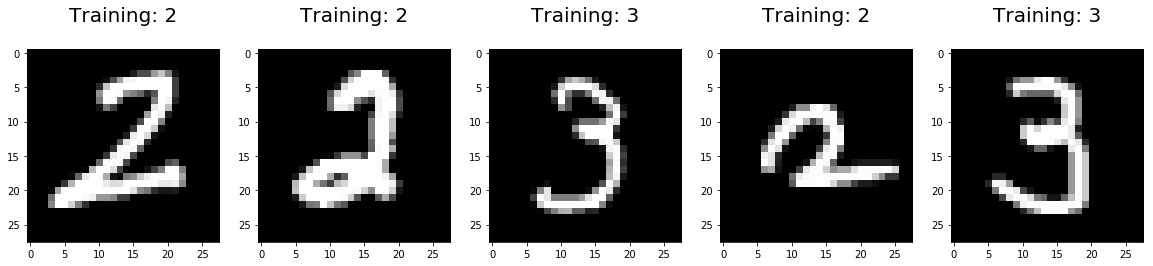

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist23.data[0:5], mnist23.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [15]:
X = mnist23.data
y = mnist23.target


Split the data into training and test(validation) sets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(mnist23.data, mnist23.target, test_size=0.20, random_state = 0)



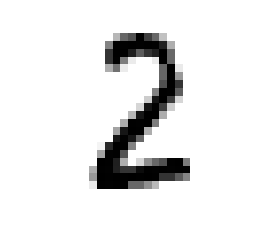

In [17]:
#Let's define a function that will allow us to visualize the digits.

def plot_digit(some_digit):
    
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()
    
plot_digit(X_train[854])


Logistic Regression best suits for Binary Classification, following has a class defined as Logistic_Regression that runs a logistic regression model on given mnist23 data (with handwritten images) and classifies it whether an image is "2" or "3" .

In [18]:

class Logistic_regression(object):
    
         
    def normalisation(self,X_train,y_train,X_val,y_val):
        
        """Let's normalise our data. The pixel will have a value between 0 and 255 (gray values).
        Let's normalise the value between 0 and 1."""
        
        X_train_normalised = X_train/255.0
        X_val_normalised = X_val/255.0
        
        """We need features along the rows, and training cases along the columns. 
        So let's reshape our dataset""" 
    
        X_train_tr = X_train_normalised.transpose()
        y_train_tr = y_train.reshape(1,y_train.shape[0])
        X_val_tr = X_val_normalised.transpose()
        y_val_tr = y_val.reshape(1,y_val.shape[0])
        
        """We will need to rescale our lables. We will compare them in the cost function with 0 and 1 (proabilities)
        and therefore our class labels must be 0 and 1, not 2 and 3. So the following step take care of it."""

        y_train_shifted = y_train_tr - 2
        y_val_shifted = y_val_tr - 2
    
        Xtrain = X_train_tr
        ytrain = y_train_shifted
        Xval = X_val_tr
        yval = y_val_shifted
    
        return Xtrain, ytrain, Xval, yval
    
    def sigmoid(self,x):
        """
        Implement the sigmoid function

        Return:
        s -- the sigmoid function evaluated on x (as in equation)
        """
    
        s = 1.0 / (1.0 + np.exp(-x))
    
        return s

    def initialize(self,dim):
        
        """
        Initialise the weights and the bias to dimensions (dim,1) for w and
        to 1 for b (a scalar)

        Arguments:
        dim -- a scalar (float)

        Return:
        w -- a matrix of dimensions (dim,1) containing all zero
        b -- a scalar = 0
        """
   
        w = np.zeros((dim,1))
        #w = np.random.uniform(-0.5,0.5,size=(dim,1))
        b = 0
    
        assert (w.shape == (dim,1))
        assert (isinstance(b, float) or isinstance(b,int))
    
        return w,b

    def gradient(self,w, b, X, Y):
        
        """
        This function calculates cost using Cross Entropy and its gradients 

        Arguments:
        w -- weights, a numpy array of size (num_px * num_px, 1) (our case 784,1)
        b -- bias, a scalar
        X -- data of size (num_px * num_px, number of examples)
        Y -- true "label" vector (containing 0 if class 2, 1 if class 3) of size (1, number of examples)

        Return:
        cost -- negative log-likelihood cost for logistic regression
        dw -- gradient of the loss with respect to w, thus same shape as w
        db -- gradient of the loss with respect to b, thus same shape as b
        """
    
        n = X.shape[1]
    
        z = np.dot(w.T,X)+b
        A = self.sigmoid(z)
        
        cost = -1.0/n*np.sum(Y*np.log(A)+(1.0-Y)*np.log(1.0-A))
    
        dw = 1.0/n*np.dot(X, (A-Y).T)
        db = 1.0/n*np.sum(A-Y)
    
        assert (dw.shape == w.shape)
        assert (db.dtype == float)
    
        cost = np.squeeze(cost)
        assert (cost.shape == ())
    
        grads = {"dw": dw, 
                 "db":db}
    
        return grads, cost

    def train(self, w, b, X, Y, num_iterations, learning_rate, print_cost = False):
        
        """
        This function updates weights and biases (w and b) by running a gradient descent algorithm
    
        Arguments:
        w -- weights, a numpy array of size (784, 1)
        b -- bias, a scalar
        X -- data of shape (784, # of samples)
        Y -- true "label" vector (containing 0 if class 2, 1 if class 3), of shape (1, # of samples)
        num_iterations -- number of iterations to optimize weights and biases
        learning_rate -- learning rate of the gradient descent update rule
        print_cost -- True to print the loss every 100 iterations
    
        Returns:
        params -- dictionary containing the weights w and bias b
        grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
        costs -- list of all the costs computed during the optimization.
        """
    
        costs = []
        
        cost = 1
        epoch = 0
        
        for i in range(num_iterations):
            
            grads, cost = self.gradient(w, b, X, Y)
        
            dw = grads["dw"]
            db = grads["db"]
            
            # update weights and bias
        
            w = w - learning_rate*dw
            b = b - learning_rate*db
            
            costs.append(cost)
        
            if i % 100 == 0:
                costs.append(cost)
            
            if print_cost and i % 100 == 0:
                print ("Cost (iteration %i) = %f" %(i, cost))
        
        grads = {"dw": dw, "db": db}
        params = {"w": w, "b": b}
        
        return params, grads, costs

    def predict (self,w, b, X_test):
        
        """
        Predict whether the label is 0 or 1 
    
        Arguments:
        w -- weights, a numpy array of size (784, 1)
        b -- bias, a scalar
        X -- data of size (784, number of samples)
    
        Returns:
        y_prediction -- a numpy array (vector) containing all predictions (0/1) 
        """
    
        n = X_test.shape[1]
        y_prediction = np.zeros((1,n))
        w = w.reshape(X_test.shape[0],1)
    
        A = self.sigmoid(np.dot(w.T, X_test)+b)
    
        for i in range(A.shape[1]):
            if (A[:,i] > 0.5): 
                y_prediction[:, i] = 1
            elif (A[:,i] <= 0.5):
                y_prediction[:, i] = 0
            
        assert (y_prediction.shape == (1,n))
    
        return y_prediction

    


Now let's define the model() function that is used to perform training on X_train and calculates the accuracy for the test data set based on the training done using logistic regression.


In [19]:
def model (X_train, y_train, X_val, y_val, num_iterations = 1000, learning_rate = 0.5, print_cost = False):
    
    lr = Logistic_regression()
    
    # After taking input first normalise the data and train on training set, predict the test set and then calculate accuracy
    
    X_train, y_train, X_val, y_val = lr.normalisation(X_train, y_train, X_val, y_val)
    
    w, b = lr.initialize(X_train.shape[0])
    
    parameters, grads, costs = lr.train(w, b, X_train, y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    y_prediction = lr.predict(w, b, X_val)
    
    match = 0
    
    y_val1, y_pred = y_val.T, y_prediction.T
    
    for i in range(y_val1.shape[0]):
        if(y_val1[i]==y_pred[i]):
            match+=1
    accuracy = (match/float(y_val1.shape[0])) * 100.0    
    
    d ={"y_prediction": y_prediction, "costs":costs, "yval": y_val, "num_iterations":num_iterations}         
    
    print ("Accuarcy of Test dataset: ",  accuracy)
    
    return d

Let's test our model.

Please replace X_val and y_val arguments in the following function call with the X_test and y_test arguments to test for accuracy.



In [20]:
k = model (X_train, 
           y_train, 
           X_val, 
           y_val,
           num_iterations = 1000,
           learning_rate = 0.05)

Accuarcy of Test dataset:  97.23483285183656


In [21]:
ypred = k["y_prediction"]
yval = k["yval"]
ypred_ravel = ypred.ravel()
yval_ravel = yval.ravel()

from sklearn.metrics import confusion_matrix

A = confusion_matrix (yval_ravel, ypred_ravel)
print("Confusion Matrix:\n",A)

Accuracy = (A[0,0]+A[1,1])/(A[0,0]+A[0,1]+A[1,0]+A[1,1])
print()
print("Accuracy using Confusion Matrix: {0:%}".format(Accuracy))

Confusion Matrix:
 [[1144   37]
 [  30 1212]]

Accuracy using Confusion Matrix: 97.234833%





Plot shows "Cost function vs. number of iterations". Let's see how Loss decreases with the number of iterations.

Text(0,0.5,'Loss')

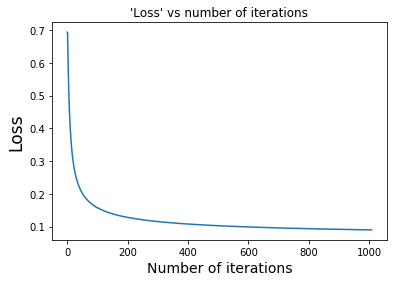

In [22]:
plt.title("'Loss' vs number of iterations")
plt.plot(k["costs"])
plt.xlabel("Number of iterations", fontsize = 14)
plt.ylabel("Loss", fontsize = 17)
